<img src="../images/Callysto_Notebook-Banner_Top_06.06.18.jpg"/>

In [1]:
# Temperary code placement to store code for hiding cells.

from IPython.display import HTML

hide_me = HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_me') {
        $(this).hide();
      }
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
      $(this).show();
    });
    $('div.output_prompt').css('opacity', 1);
  }
  code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input style="opacity:0" type="submit" value="Click here to toggle on/off the raw code."></form>''')

print("Hidden code segment block.")

hide_me

Hidden code segment block.


# Pre-requisites / Background

[comment]: # (This curriculum objective is from before the curriculum remake. It may still be an objective after though.)
**Alberta Curriculum Objective: Illustrate how Boyle's and Charles's laws, individually and combined, are related to the ideal gas law (PV = nRT ).**
http://www.learnalberta.ca/ProgramOfStudy.aspx?lang=en&ProgramId=525479#707983

In this notebook we will be working with Boyle's Law, Charles' Law, and Gay-Lussac's Law to build up to introducing the combined gas law, with a statistics extension.

We are expecting that the students understand Celsius to Kelvin conversions, converting between pressure units, calculating experimental error, and Kinetic Molecular Theory (ideal gas assumptions). If they have already been introduced to these laws, this notebook will simply provide review and extra practice.

# Introduction
Gases surround and shape the world around us all the time. From the air you breath to pneumatic gas-powered pistons that run our machinery, it is important to understand the properties of any given gas so we can better utilize it for our benefit. In a closed container, the pressure, temperature and volume dictate much of how a given gas behaves and understanding how these three properties relate to each other is fundamental to moving forward with our pursuit of understanding gas. Three laws were developed over time to correlate two of these properties at a time and assumes the third remains constant. These laws can in turn be integrated into the Combined Gas Law, which relates all three properties, assuming the amount of gas is constant.

# The Gas Laws
## Boyle's Law
How does the air pressure in your lungs and the volume of your lungs relate to help you breathe? When you breath out, you first greatly decrease the volume of your lungs. This increases the pressure exerted both on and by the air in your lungs, forcing the air out. When you breathe in, you first increase the volume of your lungs, and create an area of low air pressure in your lungs. Air from your environment then rushes into your lungs in an effort to re-establish equilibrium, and then the process repeats.

The pressure and volume of a gas, assuming constant temperature, have a inverse relationship, and without this we would be unable to breathe. Through experimentation, in 1662 Robert Boyle was able to derive this relationship. Boyle's Law is as follows:
## PV = k

Where P is the pressure in the system, V is the volume, and k is a system-specific constant. You do not need to learn about k in Chemistry 20.

If you recall back to kinetic molecular theory, the space the *isolated* gas particles occupy is considered the volume of the gas, and the pressure is the collective force the gas particles exert on the walls of its container. If the external pressure is increased, the volume available for the gas molecules is decreased. As a result, the gas molecules become closer together and will collide with each other and with the wall of the container more frequently. As the number of collisions increases, the average force exerted by the gas molecules is increased.

For the purposes of Chemistry 20 is better to understand Boyle's Law as the following equation:
## P<sub>1</sub>V<sub>1</sub> = P<sub>2</sub>V<sub>2</sub>
This equation shows how changing pressure or volume impacts the other quantity when there is a change in the system. The P/V with the one subscript are the initial pressure and volume, and the P/V with two as a subscript are the quantities after the change. Use this equation for questions relating to Boyle's Law - the equation with k is not tested in the Chemistry 20 curriculum.

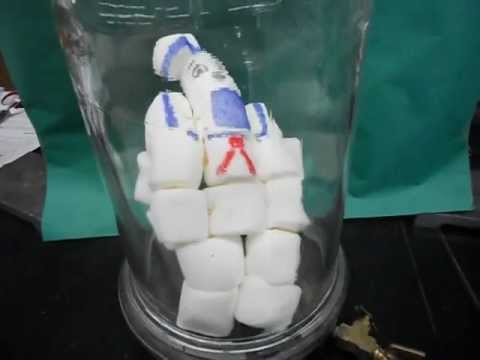

In [2]:
# Here is a youtube video that is about Boyle's Law.
# Run this code segment to bring the video into this Callysto notebook.

from IPython.lib.display import YouTubeVideo
display(YouTubeVideo('27yqJ9vJ5kQ'))

It is important to understand that Boyle's Law is a special case for a gas system where temperature is constant. If in your studies you see a question where pressure or volume are being manipulated and temperature is either explicitly or implicitly stated to be constant, this question is addressing and testing Boyle's Law.

# Experiment
Let's say we want to find the pressure in an adult male test subject's lungs when they are expanded to maximum capacity. The average lung capacity of an adult human male is 6L. We will test random lung capacities for N trials, and see how Boyle's Law shapes the relationship between pressure and volume.

In [1]:
# Change the variables in this cell to create your own experiment!

# Max volume in liters.
volume = 6

# Number of trials.
N = 100

In [2]:
# Imports, special lines of code to help generate the graph.
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import numpy as np
from numpy import random as rand
import math
init_notebook_mode(connected=True)

# Initialize data sets. This makes sure it does not graph old data from previous experiments.
gx = []
gy = []

# Constant multiple in Boyle's Law.
k = 1

# Boyle's Law is technically PV = k, where k is constant for that specific system, (It varies between systems.)
# and P1V1 = P2V2 is only a result of this relationship. Students do not need to learn this however.
# For simplicity k is set to 1.

# Randomly generate data based on user defined volume and number of trials.
for i in range(0, N):
    temp = np.random.random_sample() * volume
    
    # Prevent large outliers.
    # The limit is arbitrary, it is just so the graph looks nice and so the relationship is clearly defined.
    limit = np.random.random_sample() + 1
    while(k/temp > volume/limit):
        temp = np.random.random_sample() * volume
    
    # Adds standard deviation to points (For more info see Intro to Standard Deviation).
    outputx = rand.uniform(temp-(rand.random_sample()/3), temp+(rand.random_sample()/3))
    outputy = np.random.uniform((k/temp)-(np.random.random_sample()/3), (k/temp)+(np.random.random_sample()/3))
    
    # Add the values to the list of data.
    gx.append(outputx)
    gy.append(outputy)

# Organizes data.
trace = go.Scatter(x=gx, y=gy, mode='markers')

# Labels graph.
templayout = go.Layout(title='Pressure vs. Volume', xaxis=dict(title='Volume'), yaxis=dict(title='Pressure'))

# Renders graph. 
tempdata = [trace]
fig = go.Figure(data=tempdata, layout=templayout)
py.iplot(fig, filename='scatter-plot')

# Questions
There are three questions below that test Boyle's Law. There is a code segment that you can run after each question to check your answer. Before you do so though, run the code segment below this text. Each of the answers are encrypted, and this code decrypts it in order to test if it is correct. To be extra clear, the long string of characters and numbers such as `845e85fa64a2d6037055beba19fe0bd8` that you will see is not the answer, it is the encrypted answer. Furthermore, round to the nearest significant figure.

In [5]:
# Imports.
from IPython.display import display 
from ipywidgets import widgets
import hashlib

# Check the answer given by the student.
def check_answer(x):
    temp = -10000
    try:
        temp = hashlib.md5(str.encode(str(text.value))).hexdigest()
    except:
        print("Not a number.")
    if(temp == answer and temp != -10000):
        print("Correct!")
    else:
        print("Incorrect. Try again!")

1. Assume the temperature and the number of gas molecules stay constant within the adult’s lung. Initially, the capacity of the lung is 3.4 liters, and the pressure in the adult’s lung is 15 mmHg. When the lung is expanded to the maximum capacity (average maximum capacity of adult's lung is 6 liters), use Boyle’s Law to determine the new pressure in mmHg within the adult’s lung. 

In [6]:
# Encrypted answer.
answer = '845e85fa64a2d6037055beba19fe0bd8'

# Create answer box.
text = widgets.Text()
display(text)
text.on_submit(check_answer)

Text(value='')

2. Assume the temperature and the number of gas molecules stay constant within the balloon. A small gas container has 90 milliliters of nitrogen which in pumped into a balloon with a pressure of 1.0 atm. The balloon is sealed tightly, and it is released and raised to a higher altitude where the atmospheric pressure is 50 kPa. Find the final volume of the balloon in liters as it raises up to the mountain. 

In [7]:
# Encrypted answer.
answer = 'c6e10b90290ed2ee26046b9976bf9f02'

# Create answer box.
text = widgets.Text()
display(text)
text.on_submit(check_answer)

Text(value='')

3. Assume the temperature and the number of gas molecules stay constant within a flexible plastic pump. With the pump closed, by what factor does pressure need to change in order for the volume of the pump to be half of its original size? 

In [8]:
# Encrypted answer.
answer = 'c81e728d9d4c2f636f067f89cc14862c'

# Create answer box.
text = widgets.Text()
display(text)
text.on_submit(check_answer)

Text(value='')

# Charles' Law
The temperature of the nitrogen gas in airbags is originally extremely high so that the volume of the airbag is expands quickly due to the directly proportional relationship between the temperature and the volume of the gas. When the airbag is later exposed to the cooler outside air, the temperature of the nitrogen gas gradually changes which causes the volume of the airbag to slowly decrease in size, creating a softer cushion for the impact. This relationship, where pressure is constant, was developed in 1787 by Jacques Charles. It can be expressed by the equation below: ![V1/T1=V2/T2](Images/charles-law.png)

# Optional Reading - Pressure does change, but returns to its original value
Using the kinetic molecular theory to explain the Charles' Law, imagine that the pressure and the chemical amount of gas are held constant using a piston. When the temperature of the gas molecules increases, the gas molecules will move at a higher speed because temperature and the average kinetic energy of the gas molecules have a direct relationship. As a result, gas molecules will collide with each other and with walls of the container more frequently which exerts a greater force on the wall of container. Because the external pressure on the container is held constant, but the gas pressure inside the container are increased, the piston of the container is pushed up to increase the volume of the container.

# Experiment
Let's say we want to drive a car into a wall but save our crash test dummy with a standard airbag that has an average volume of 70L when inflated. We will run a few simulations to find out what average temperature we need the nitrogen gas to be at to inflate the airbag to the desired volume. 

In [9]:
# Imports, information to help generate graph.
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import numpy as np
import random

In [10]:
#STEP 1
#set these values ONCE at the beginning of your experiment

ave_volume=10 #in litres
sd=10 # Standard deviation of the data. More information: Intro to Standard Deviation Notebook

volumes = []
temps = []
trials = []

In [11]:
#STEP 2
#run this cell to generate values to populate your table, then run the table-generating cell
yielded = random.uniform((ave_volume-sd), (ave_volume+sd))

volume = round(yielded, 2)
volumes.append(volume)

k = 0.56 #constant for simplicity
temps.append(k*volume)

if len(volumes) > len(trials):
    trials.append('Trial ' + str(len(volumes)))

In [12]:
#STEP 3
#graph-generating cell - run after generating each new data pair

init_notebook_mode(connected=True)

#generates volume bars
trace1 = go.Bar(
    x=trials,
    y=volumes,
    name='Volume'
)

#generates temperature bars
trace2 = go.Bar(
    x=trials,
    y=temps,
    name='Temperature'
)

#gives graph grouped-bars layout
data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

#generates graph
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

# Questions
There are three questions below that test Charles' Law. There is a code segment that you can run after each question to check your answer. Before you do so though, run the code segment below this text. Each of the answers are encrypted, and this code decrypts it in order to test if it is correct. To be extra clear, the long string of characters and numbers such as `845e85fa64a2d6037055beba19fe0bd8` that you will see is not the answer, it is the encrypted answer. Furthermore, round to the nearest significant figure.

In [13]:
# Imports.
from IPython.display import display 
from ipywidgets import widgets
import hashlib

# Check the answer given by the student.
def check_answer(x):
    temp = -10000
    try:
        temp = hashlib.md5(str.encode(str(text.value))).hexdigest()
    except:
        print("Not a number.")
    if(temp == answer and temp != -10000):
        print("Correct!")
    else:
        print("Incorrect. Try again!")

1. A specific amount of gas molecules is sealed within a container with a movable piston. The initial volume of the gas within the cylinder is 3.0 liters at 10 degrees C. What will be the final volume of the gas container in liters when the temperature is raised up to 30 degrees C?  

In [14]:
# Encrypted answer.
answer = 'acff46b161a3b7d6ed01ba79a032acc9'

# Create answer box.
text = widgets.Text()
display(text)
text.on_submit(check_answer)

Text(value='')

2. For a hot balloon that contains helium gas, it initially contains 1000$m^{3}$ at a temperature of 20.00 degrees C. As fire is burning at the bottom of the balloon, what is the minimum temperature in Celsius needed for the hot balloon in order for the volume to increase to 17000 $m^{3}$?


In [15]:
# Encrypted answer.
answer = 'a78e17c964d3593d89cde3fb678f6a14'

# Create answer box.
text = widgets.Text()
display(text)
text.on_submit(check_answer)

Text(value='')

3. When a float pool contains gas at 20 degrees C, and it is heated up an additional 14 degrees C, what is the new volume in liters if it contained 3.2 liters of gas originally?

In [16]:
# Encrypted answer.
answer = '31053ad0506e935470ca21b43cae98cf'

# Create answer box.
text = widgets.Text()
display(text)
text.on_submit(check_answer)

Text(value='')

# Gay-Lussac's Law
If you watched a gun fire, you would see a plume of smoke as the gunpowder burns and the bullet whizzes out. The increase in temperature caused an increase in the pressure, which forced the bullet out of the barrel. 

In technical terms, the average kinetic energy of the molecule is referred to as the temperature, and the density of the particles is referred to as the pressure. The relationship between the two variables at a constant volume is a direct relationship was defined by Joseph Louis Gay-Lussac in 1809. It can be expressed by the equation below: ![P1/T1=P2/T2](Images/Gay-Lussacs-Law.png)

Using the kinetic molecular theory to explain the Gay-Lussac's Law, the volume and the chemical amount of gas are held constant. When the temperature of the gas molecules are increased, the gas molecules will move at a higher speed because temperature and the average kinetic energy of the gas molecules have a direct relationship. As a result, gas molecules will collide with each other and with the wall of the container more frequently which exerts a greater force on the wall of container which increases the pressure of the gas. 

# Experiment
The chamber pressure in a gun is roughly 344737.86 kPa at least. We can predict the approximate temperature the gunpowder would need to burn at because the two are directly proportional.

In [17]:
#imports, information to help generate table
import pandas as pd
import matplotlib as mpl
import numpy as np
import random

In [18]:
#STEP 1
#set these values ONCE at the beginning of your experiment

ave_pressure = 100 #in kPa
sd = 4 # Standard deviation of the data. More information: Intro to Standard Deviation Notebook

trials = [] #leave this blank for now - values will be added later!

In [19]:
#STEP 2
#run this cell to generate values to populate your table, then run the table-generating cell
yielded = random.uniform((ave_pressure-sd), (ave_pressure+sd))

pressure = round(yielded, 2)

k = 2 #contant for simplicity

trials.append((pressure, k*pressure))

In [20]:
#STEP 3
#table-generating cell - run after generating each new data pair
labels = ['Pressure', 'Temperature']
trials.sort()
df = pd.DataFrame.from_records(trials, columns=labels)
df.head
df.style
#run step 2 then step 3 repeatedly until satisfied with your table of values

,Pressure,Temperature
0,99.18,198.36


# Questions
There are three questions below that test Gay-Lussac's Law. There is a code segment that you can run after each question to check your answer. Before you do so though, run the code segment below this text. Each of the answers are encrypted, and this code decrypts it in order to test if it is correct. To be extra clear, the long string of characters and numbers such as `845e85fa64a2d6037055beba19fe0bd8` that you will see is not the answer, it is the encrypted answer. Furthermore, round to the nearest significant figure.

In [21]:
# Imports.
from IPython.display import display 
from ipywidgets import widgets
import hashlib

# Check the answer given by the student.
def check_answer(x):
    temp = -10000
    try:
        temp = hashlib.md5(str.encode(str(text.value))).hexdigest()
    except:
        print("Not a number.")
    if(temp == answer and temp != -10000):
        print("Correct!")
    else:
        print("Incorrect. Try again!")

1. The gas particles are in a sealed container at 200 mmHg under the 15.0 degrees C room temperature. When the pressure on the gas particles is increased to 560 mmHg, what is the new temperature of the gas molecules in Celsius?

In [22]:
# Encrypted answer.
answer = 'c399862d3b9d6b76c8436e924a68c45b'

# Create answer box.
text = widgets.Text()
display(text)
text.on_submit(check_answer)

Text(value='')

2. A cylinder container has a constant fixed volume at a temperature of 30.0 degrees C and a pressure of 101 kPa. As the pressure on the container is increased to 200 kPa, how much percentage of the temperature are increased?


In [23]:
# Encrypted answer.
answer = '4fac9ba115140ac4f1c22da82aa0bc7f'

# Create answer box.
text = widgets.Text()
display(text)
text.on_submit(check_answer)

Text(value='')

3. If a gun needs 351867.04 kPa to shoot out a bullet, and the gun initially exerts a pressure of 1000.00kPa on the bullet at a temperature of 20.0000 Celsius. How much would the temperature need to be increased in Celsius in order for the bullet to be shot? 

In [24]:
# Encrypted answer.
answer = 'cea6e0b18604bc926d0fba9701e40359'

# Create answer box.
text = widgets.Text()
display(text)
text.on_submit(check_answer)

Text(value='')

# Combined Gas Law
The Combined Gas Law takes Boyle’s, Gay-Lussac’s, and Charles’ Laws into one equation where the amount of gas is constant. The inverse relationship between pressure and volume is maintained as well as the directly proportional relationship between pressure and temperature, and volume and temperature. It can be expressed by the equation below: ![P1V1/T1=P2V2/T2](Images/combined-gas-law.png)

# Questions
There are three questions below that test the Combined Gas Law. There is a code segment that you can run after each question to check your answer. Before you do so though, run the code segment below this text. Each of the answers are encrypted, and this code decrypts it in order to test if it is correct. To be extra clear, the long string of characters and numbers such as `845e85fa64a2d6037055beba19fe0bd8` that you will see is not the answer, it is the encrypted answer. Furthermore, round to the nearest significant figure.

In [25]:
# Imports.
from IPython.display import display 
from ipywidgets import widgets
import hashlib

# Check the answer given by the student.
def check_answer(x):
    temp = -10000
    try:
        temp = hashlib.md5(str.encode(str(text.value))).hexdigest()
    except:
        print("Not a number.")
    if(temp == answer and temp != -10000):
        print("Correct!")
    else:
        print("Incorrect. Try again!")

1. A balloon that contains 10L of helium gas at an atmospheric pressure of 101 kPa and at a temperature of 25 degrees C is released to rise into the upper atmosphere where the temperature is -10 degrees C and the atmospheric air pressure is 15 kPa. During the experiment, the measured volume of the balloon after it rises to a higher altitude is 60 L. Assume gas cannot escape and calculate the experimental error as a percentage.

In [26]:
# Encrypted answer.
answer = 'e93bb0ef149f78aeae0eab58c5a28758'

# Create answer box.
text = widgets.Text()
display(text)
text.on_submit(check_answer)

Text(value='')

2. A balloon that contains hydrogen gas has 5.0 liters when it is measured on a mountain where the air atmospheric pressure is only 30 kPa, and the temperature is only -30 degrees C. What is the new volume of the balloon if the balloon occupies at SATP? (SATP conditions: 25 degrees C and 100 kPa)

In [27]:
# Encrypted answer.
answer = 'f932bed2d12442d21507b51d22b88dd7'

# Create answer box.
text = widgets.Text()
display(text)
text.on_submit(check_answer)

Text(value='')

3. A gas is measured to have a volume of 20.0 liters at a temperature of 20.0 degrees C and at an atmospheric pressure of 1.00 atm. As the gas is raised up to a higher air pressure, what is the new air pressure in atm if the final volume measured is 10.0 liters and the temperature is 5.00 degrees C.

In [28]:
# Encrypted answer.
answer = 'c3cce38563b9d2b2ac15c5b15ffc8c05'

# Create answer box.
text = widgets.Text()
display(text)
text.on_submit(check_answer)

Text(value='')

# Summary
When performing these equations, it is important to ask yourself the questions below:
1. Which of the quantities do you know?
2. What quantity is constant? (Pressure, volume, or temperature?)
3. Are the values in correct units?
4. Is the question asking for the values in certain units or for the magnitude by which a value needs to be increased or decreased?
5. After doing the algebra, does the unit analysis make sense?

# Conclusion
In this section, we introduced the different relationships between pressure, volume, and temperature, and the three different laws associated with them. These are Boyle's Law for pressure and volume where temperature is constant, Charles' Law for volume and temperature where pressure is constant, and Gay-Lussac's Law for pressure and temperature where volume is constant. Finally, we brought all three laws together into the combined gas law. 